# Pandas


**Pandas** (from 'Panels data') is built on NumPy and is a critical package for a data scientist

**Data munging** - taking data in one format and making it conform to another format

#### Two main Pandas data objects:
* Series
* DataFrames

### Series

The series is essentially a labelled NumPy vector



In [1]:
import pandas as pd

In [97]:
prices = pd.Series([1,1,2,3,5],
            index =['apple', 'pear', 'banana', 'mango', 'jackfruit'])


In [98]:
print(prices)

apple        1
pear         1
banana       2
mango        3
jackfruit    5
dtype: int64


Inspecting the `.index` attribute of the series, we see the following:

In [6]:
prices.index

Index(['apple', 'pear', 'banana', 'mango', 'jackfruit'], dtype='object')

This index allows slicing based on index label, in addition to being able to slice by the numeric index value, as in a list or array.

Single values can be accessed by simply passing the index label within square brackets:

In [8]:
prices['mango']

3

Use the `.loc` method to slice by the index label:

In [9]:
prices.loc['banana':]

banana       2
mango        3
jackfruit    5
dtype: int64

You can also use `.loc` method to subset by a list.

In [12]:
my_fruits = ['apple', 'banana', 'mango']

In [13]:
prices.loc[my_fruits]

apple     1
banana    2
mango     3
dtype: int64

Use the `.iloc` method to slice by numeric index value:

In [10]:
prices.iloc[0:3]

apple     1
pear      1
banana    2
dtype: int64

**Warning**: Since Pandas allows Series to have numeric labels, there is the potential to confuse numeric indexes and numeric labels. Always be sure to explicitly specify `.loc` or `.iloc` to avoid confusion.

### Series Operations

Mathematical operations between series are sensible and are based on the index labels. 

In [16]:
inventory = pd.Series([10, 50, 41, 22],
            index=['pear', 'banana', 'mango', 'apple'])

In [17]:
prices * inventory

apple         22.0
banana       100.0
jackfruit      NaN
mango        123.0
pear          10.0
dtype: float64

Comparison operators on a Series will return a boolean Series, which is useful for subsetting.

In [18]:
inventory > 20

pear      False
banana     True
mango      True
apple      True
dtype: bool

Here are a couple ways to accomplish a subsetting operation using this behavior:

In [19]:
inventory.loc[inventory > 20]

banana    50
mango     41
apple     22
dtype: int64

In [24]:
excess_inv = inventory > 40

In [26]:
inventory.loc[excess_inv]

banana    50
mango     41
dtype: int64

### Useful Series methods

Pandas has many methods for the Series object, including some that are especially useful for data exploration and basic statistical calculations:

`.mean()`        --> calculates arithmetic average

`.std()`         --> calculates standard deviation

`.median()`      --> finds median

`.describe()`    --> calculates summary statistics


In [27]:
prices.mean()

2.4

In [28]:
inventory.std()

18.09926333675858

In [29]:
prices.median()

2.0

In [30]:
inventory.describe()

count     4.000000
mean     30.750000
std      18.099263
min      10.000000
25%      19.000000
50%      31.500000
75%      43.250000
max      50.000000
dtype: float64

### Iteration

* Conventional iteration is possible, but not advised
* FOr applying some function or operation to each element in a Pandas Series, utilize the `.apply` method, possibly in combination with a `lambda` function.

In [33]:
disc_prices = prices.apply(lambda x: 0.9 * x if x > 3 else x)

In [34]:
disc_prices

apple        1.0
pear         1.0
banana       2.0
mango        3.0
jackfruit    4.5
dtype: float64

pandas Series documentation:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

#### Pandas Series Challenges:

In [74]:
"""
    Using .iloc, select the items in inventory at indices 1 and 3.
    (This is possible, but may take some creative thinking.)
    Select the items with prices of less than the mean price.
    Return the total value of mangoes on hand.
"""


import pandas as pd
prices = pd.Series([1,1,2,3,5],
              index=['apple', 'pear', 'banana', 'mango', 'jackfruit'])

inventory = pd.Series([10, 50, 41, 22],
              index=['pear', 'banana', 'mango', 'apple'])


one_ind = inventory.iloc[1::2]
two_less = prices.loc[prices < prices.mean()]
three_onhand = (prices['mango'] * inventory['mango'])

In [75]:
print(one_ind)

banana    50
apple     22
dtype: int64


In [42]:
prices.loc[prices < prices.mean()]

apple     1
pear      1
banana    2
dtype: int64

In [43]:
mango_val = (prices['mango'] * inventory['mango'])

In [44]:
mango_val

123

In [45]:
inventory.iloc()

In [76]:
inventory.iloc[1]


50

In [77]:
inventory.iloc[3]

22

In [64]:
inventory.index[1]

'banana'

### DataFrames

vectors : series :: matrices : dataframes

DataFrames can be created from a variety of sources, including nested lists, dictionaries, NumPy arrays, Series, Excel spreadsheets, etc.

Below we instantiate a DataFrame from a dictionary based on the Seies we used earlier

In [78]:
produce = pd.DataFrame({'price': prices, 'disc_price': disc_prices,
                       'inventory': inventory})

In [79]:
produce

,price,disc_price,inventory
apple,1,1.0,22.0
banana,2,2.0,50.0
jackfruit,5,4.5,NaN
mango,3,3.0,41.0
pear,1,1.0,10.0


In [82]:
# access a single value by passing row name and column name

produce.loc['pear','price']

1

In [89]:
# slice rows by numeric indexes

produce.iloc[2:, [0,2]]


,price,inventory
jackfruit,5,NaN
mango,3,41.0
pear,1,10.0


In [95]:
# slice returning all columns for specific rows

produce.iloc[[0, 2, 4], :]



,price,disc_price,inventory
apple,1,1.0,22.0
jackfruit,5,4.5,NaN
pear,1,1.0,10.0


In [96]:
# select an entire column based on name

produce['disc_price']

apple        1.0
banana       2.0
jackfruit    4.5
mango        3.0
pear         1.0
Name: disc_price, dtype: float64

In [100]:
# select all rows an return only columns with a max value
# greater than 5

produce.loc[:, produce.max() > 5]

,inventory
apple,22.0
banana,50.0
jackfruit,NaN
mango,41.0
pear,10.0


In [101]:
# slice rows where price equals 1 and return all columns

produce.loc[produce['price'] == 1, :]

,price,disc_price,inventory
apple,1,1.0,22.0
pear,1,1.0,10.0


### Adding and Removing Columns

Creating a new colum requires only to state the desired name and to assign a Series or other data type to it.




In [104]:
produce['inventory_val'] = produce['inventory'] * produce['price']

In [105]:
produce

,price,disc_price,inventory,inventory_val
apple,1,1.0,22.0,22.0
banana,2,2.0,50.0,100.0
jackfruit,5,4.5,NaN,NaN
mango,3,3.0,41.0,123.0
pear,1,1.0,10.0,10.0


Removing columns can be accomplished with the `.drop` method, but requires a couple of extra arguments.

The `.drop` method works on **rows** by default. To make it work on columns, we must specify an `axis` argument (rows: axis=0, columns: axis=1).

The default behavior is also that `.drop` creates a *new* DataFrame or Series. In order to actually drop the row or column from an existing DataFrame it is necessary to set the `inplace` argument to **True**.

In [106]:
produce.drop('inventory_val', axis = 1, inplace = True)

In [107]:
produce

,price,disc_price,inventory
apple,1,1.0,22.0
banana,2,2.0,50.0
jackfruit,5,4.5,NaN
mango,3,3.0,41.0
pear,1,1.0,10.0


### Updating Values

Values in the DataFrame can be updated via explicit assignment.

In the example below, all fruit with a price >= 3 has its price reset to 2.50.

In [109]:
produce.loc[produce.price>=3, 'price'] = 2.50


In [110]:
produce

,price,disc_price,inventory
apple,1.0,1.0,22.0
banana,2.0,2.0,50.0
jackfruit,2.5,4.5,NaN
mango,2.5,3.0,41.0
pear,1.0,1.0,10.0


#### DataFrame Challenge Problem

In [117]:
"""
    Select all information from produce for pear and jackfruit
    Create a clearance_price column in produce which includes prices reduced from the original prices by 50%. Then set two_clearance equal the entire row at index 3.
"""

import pandas as pd

prices = pd.Series([1,1,2,3,5],
              index=['apple', 'pear', 'banana', 'mango', 'jackfruit'])

inventory = pd.Series([10, 50, 41, 22],
              index=['pear', 'banana', 'mango', 'apple'])

discount_prices = prices.apply(lambda x: .9*x if x>3 else x)

produce = pd.DataFrame({'price':prices,
                        'discount_price':discount_prices,
                        'inventory':inventory})



one_select = produce.loc[['pear','jackfruit'],:]
produce['clearance_price'] = produce['price'] * 0.5

two_clearance = produce.iloc[3,:]





In [118]:
print(one_select)

           price  discount_price  inventory
pear           1             1.0       10.0
jackfruit      5             4.5        NaN


In [119]:
produce


,price,discount_price,inventory,clearance_price
apple,1,1.0,22.0,0.5
banana,2,2.0,50.0,1.0
jackfruit,5,4.5,NaN,2.5
mango,3,3.0,41.0,1.5
pear,1,1.0,10.0,0.5


In [120]:
two_clearance

price               3.0
discount_price      3.0
inventory          41.0
clearance_price     1.5
Name: mango, dtype: float64

## Merging DataFrames

It is often useful to combine separate, but related, datasets. This could be accomplished in SQL with a `JOIN` query, but it may be more convenient and efficient to do it directly with Pandas.


### Concatenating DataFrames

The most basic way to combine DataFrames is by essentially stacking them, using `pd.concat`.

The obvious use case here is to combine datasets that include different observations but have the same categories/column names.

In [121]:
# Sample data

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                        index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])


In [122]:
# create a list of the DataFrames to be concatenated

frames = [df1, df2, df3]

In [123]:
# assign the new df a name and pass the list to the pd.concat method

result = pd.concat(frames)

In [124]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [126]:
# it is also possible to concatenate DataFrames horizontally,
# though in our example above the outcome would be unsatisfactory

result2 = pd.concat(frames, axis=1)

In [127]:
result2

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


### Merging DataFrames

To accomplish SQL-style joins, `pd.merge` is a very flexible approach.

In [129]:
# Sample data

left = pd.DataFrame({'key': ['dog', 'cat', 'fish', 'bird'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['bird', 'fish', 'cat', 'dog'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [130]:
new_df = pd.merge(left, right, on='key')


In [131]:
new_df


,key,A,B,C,D
0,dog,A0,B0,C3,D3
1,cat,A1,B1,C2,D2
2,fish,A2,B2,C1,D1
3,bird,A3,B3,C0,D0


Joins using multiple keys are also possible, as in the following example:

In [132]:
# sample data

cities1 = pd.DataFrame({'city': ['Springfield', 'Springfield',
                                  'Dover', 'Chicago'],
                         'state': ['IL', 'OH', 'DE', 'IL'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})

cities2 = pd.DataFrame({'city': ['Cleveland', 'Dover',
                                   'Springfield', 'Chicago'],
                          'state': ['OH', 'NH', 'IL', 'IL'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [133]:
merged_cities = pd.merge(cities1, cities2, on=['city', 'state'])

In [134]:
merged_cities

,city,state,A,B,C,D
0,Springfield,IL,A0,B0,C2,D2
1,Chicago,IL,A3,B3,C3,D3


**IMPORTANT**
The `merge` defaults to an *inner* join, but it is possible to control this behavior with the `how` argument.

`how` --> defaults to `'inner'`, but `'left'`, `'right'`, and `'outer'` are also available.

| Merge method     	| SQL JOIN Name        	| Description                               	|
|------------------	|----------------------	|-------------------------------------------	|
| left             	| LEFT OUTER JOIN      	| Use keys from left frame only             	|
| right            	| RIGHT OUTER JOIN     	| Use keys from right frame only            	|
| outer            	| FULL OUTER JOIN      	| Use union of keys from both frames        	|
| inner            	| INNER JOIN           	| Use intersection of keys from both frames 	|

### Pandas Merge Challenge


In [5]:
'''Join the DataFrames below to return a new DataFrame of users with
listed birthdays, along with their addresses if you have them.'''



import pandas as pd
dobs = pd.DataFrame({'name': ['Suzy', 'Wei','Yulia', 'Arvind'],
                   'day': ['12', '19', '2', '23'],
                   'month': ['Dec', 'Nov', 'May', 'Jul']})

addresses = pd.DataFrame({'name': ['Marisol', 'Arvind','Stephan', 'Suzy'],
                     'city': ['San Francisco', 'Denver', 'Austin', 'Seattle'],
                     'state': ['CA', 'CO', 'TX', 'WA']})


birthday_address = pd.merge(dobs, addresses, on='name',how='left')

In [2]:
dobs


,name,day,month
0,Suzy,12,Dec
1,Wei,19,Nov
2,Yulia,2,May
3,Arvind,23,Jul


In [3]:
addresses

,name,city,state
0,Marisol,San Francisco,CA
1,Arvind,Denver,CO
2,Stephan,Austin,TX
3,Suzy,Seattle,WA


In [6]:
birthday_address


,name,day,month,city,state
0,Suzy,12,Dec,Seattle,WA
1,Wei,19,Nov,NaN,NaN
2,Yulia,2,May,NaN,NaN
3,Arvind,23,Jul,Denver,CO


### Split, Apply and Combine Data

Subsetting datasets can be useful to get a better understanding of the data during EDA and will likely be necessary during analysis.

This section covers the strategy known as *split-apply-combine*.

##### Overview of Split-Apply-Combine:
1. split data into subsets
2. apply some calculation(s) to each of those subsets
3. combine the results into a new dataset


#### Splitting data

The tool for doing this in Pandas is the `.groupby()` method.

This method is similar to a SQL `GROUP BY` statement, but has more flexibility and features.

The `.groupby` method returns a special `DataFrameGroupBy` object which has a number of useful methods of its own.

* `aggregate` returns a single value for each group, so it is useful for rolling groups up into summary statistics (e.g. mean). It iterates over *groups* and performs the operation called on the group as a whole.


* `transform` is for applying calculations to each observation, by iterating over *each row* and operating on each value indvidually.


* `filter` is for filtering *by group*. For example if you wanted to elminate groups with a small number of observations, you would first use `.groupby` to subset the DataFrame into groups, then utilize `filter` to remove groups not meeting the minimum threshold. Every item in groups that pass are returned by '`filter`.


* `apply` is a general catch all that places no constraints on the type of data returned.

In [9]:
# example data

grocery = pd.DataFrame({'category':['produce', 'produce', 'meat',
                                        'meat', 'meat', 'cheese', 'cheese'],
                            'item':['celery', 'apple', 'ham', 'turkey',
                                    'lamb', 'cheddar', 'brie'],
                            'price':[.99, .49, 1.89, 4.34, 9.50, 6.25, 8.0]})

In [10]:
grocery


,category,item,price
0,produce,celery,0.99
1,produce,apple,0.49
2,meat,ham,1.89
3,meat,turkey,4.34
4,meat,lamb,9.50
5,cheese,cheddar,6.25
6,cheese,brie,8.00


In [11]:
grocery.groupby('category')

In [12]:
grouped = grocery.groupby('category')

In [14]:
import numpy as np

In [15]:
grouped.aggregate(np.mean)

,price
category,
cheese,7.125000
meat,5.243333
produce,0.740000


**category** becomes the index of the above object

In [16]:
grouped.transform(lambda x: x - x.mean())

,price
0,0.250000
1,-0.250000
2,-3.353333
3,-0.903333
4,4.256667
5,-0.875000
6,0.875000


In [ ]:
# The index above is the same as in the original df

In [21]:
# to filter the dataset by the number of entries in each group
# you can call the len() function

grouped.filter(lambda x: len(x)>2)

,category,item,price
2,meat,ham,1.89
3,meat,turkey,4.34
4,meat,lamb,9.50


In [18]:
grouped.filter(lambda x: len(x)<=2)

,category,item,price
0,produce,celery,0.99
1,produce,apple,0.49
5,cheese,cheddar,6.25
6,cheese,brie,8.00


If you want to re-index a subgroup, you can use the `.reset_index()` method, which re-indexes the subgroup and moves the original index into a regular comlumn.

In [22]:
grouped.filter(lambda x: len(x)<=2).reset_index()

,index,category,item,price
0,0,produce,celery,0.99
1,1,produce,apple,0.49
2,5,cheese,cheddar,6.25
3,6,cheese,brie,8.00


### Pandas Groupby Challenge

Use *split-apply-combine* in order to:

1. Remove all items in categories where the mean price in that category is less than $3.00.
    
2. Find the maximum values in each category for all features. (What does Pandas take to be the maximum value of the 'item' column?)

3. If the maximum price in a category is more than $3.00, reduce all prices in that category by 10%. Return a Series of the new price column.


In [24]:
import pandas as pd
import numpy as np

grocery = pd.DataFrame({'category':['produce', 'produce', 'meat',
                                    'meat', 'meat', 'cheese', 'cheese'],
                        'item':['celery', 'apple', 'ham', 'turkey',  'lamb',
                                'cheddar', 'brie'],
                        'price':[.99, .49, 1.89, 4.34, 9.50, 6.25, 8.0]})

grouped = grocery.groupby('category')

one_mean = grouped.filter(lambda x: np.mean(x)>3)

two_max = grouped.aggregate(lambda x: max(x))

three_round = grocery.groupby('category')["price"].transform(lambda x: (x * 0.9) if np.mean(x) > 3 else x)

In [25]:
grocery

,category,item,price
0,produce,celery,0.99
1,produce,apple,0.49
2,meat,ham,1.89
3,meat,turkey,4.34
4,meat,lamb,9.50
5,cheese,cheddar,6.25
6,cheese,brie,8.00


In [29]:
grouped = grocery.groupby('category')


In [33]:
grouped.filter(lambda x: np.mean(x)>3)

,category,item,price
2,meat,ham,1.89
3,meat,turkey,4.34
4,meat,lamb,9.50
5,cheese,cheddar,6.25
6,cheese,brie,8.00


In [47]:
grouped.aggregate(lambda x: max(x))

,item,price
category,,
cheese,cheddar,8.00
meat,turkey,9.50
produce,celery,0.99


In [49]:
grocery.groupby('category')["price"].transform(lambda x: (x * 0.9) if np.max(x) > 3 else x)

0    0.990
1    0.490
2    1.701
3    3.906
4    8.550
5    5.625
6    7.200
Name: price, dtype: float64

In [51]:
# to check results
cat_max = grocery.groupby('category')["price"].aggregate(lambda x: np.max(x))

In [52]:
cat_max

category
cheese     8.00
meat       9.50
produce    0.99
Name: price, dtype: float64

## Visualizing Data with Pandas

It is possible to visualize data directly in Pandas using Pandas methods, which work by connecting to Matplotlib. For more complex plotting, it is better to use Matplotlib (or another package, like Seaborn) directly.

This is handy, because it makes doing initial visualization during Exploratory Data Analysis quicker and more convenient.

Both Series and DataFrames have `.plot()` methods.

In [60]:
# set up some sample data
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(100, 2), columns=['A','B'])

However, if you have not imported **matplotlib**, calling the `.plot` method simply returns a description of the plot object, as seen immediately below the call. 

In order to see the plot, matplotlib needs to be imported and `plt.show()` needs to be called.

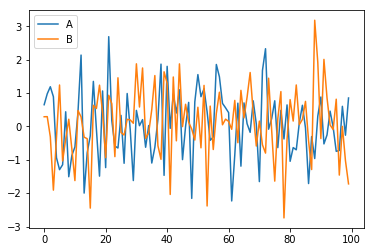

In [61]:
df.plot()

In [62]:
import matplotlib.pyplot as plt

In [63]:
plt.show()

The `.plot()` method is highly customizable with keyword arguments.

One helpful keyword is `kind=` which allows you to set the plot type. The default is `kind='line'`, as seen above.

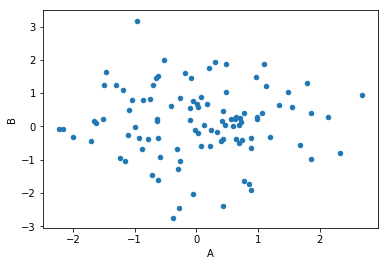

In [64]:
df.plot(x = 'A', y = 'B', kind='scatter')

### Plotting distributions

Looking at your distributions is a key part of EDA. Pandas includes several types in the `.plot()` method. Below the histogram (keyword: `'hist'`) is shown:

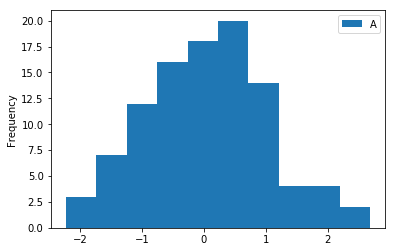

In [65]:
df.plot(y = 'A', kind='hist')

The number of bins in the histogram can be controlled in the `.plot()` call, using the `bins=` keyword argument. The default is set to ten.

In [ ]:
# Example as above, but with bins set to 20



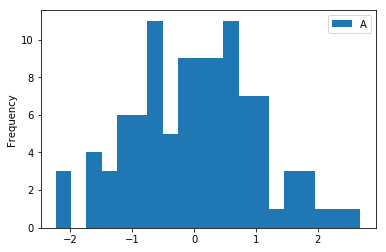

In [66]:
df.plot(y = 'A', kind='hist', bins=20)

#### .plot() kind keywords available

* 'line' - line plot (default)

* 'bar' - vertical bar graph

* 'barh' - horizontal bar graph

* 'hist' - histogram

* 'box' - boxplot

* 'kde' - Kernel Density Estimation plot

* 'area' - area plot

* 'pie' - pie graph

* 'scatter' - scatter plot

* 'hexbin' - hexbin plot

There are some more advanced tools in Pandas' `plotting` module. One good one is `scatter-matrix`, as shown below.

In [67]:
# add a third column to the sample data
df['c'] = df['A'] + df['B']

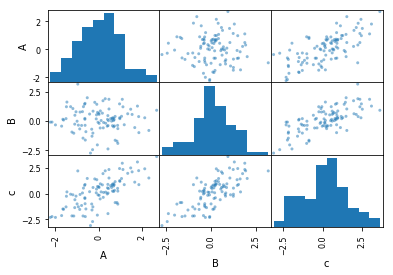

In [73]:
_ = pd.plotting.scatter_matrix(df)
plt.show()

## File Input/Output

* Inputing data to Pandas from multiple source types

* Outputing data from Pandas to files and databases


#### Reading Flat files

Reading delimited text files is easy with `pd.read_csv()`. As the name implies, the default behavior is to read Comma Separated Values files, but the delimiter type can be adjusted with the keyword argument `sep=` (sep stands for separator). 

The syntax for a basic `pd.read_csv` call is very simple:

        df = pd.read_csv('/path/to/file/data.csv')
        
It isn't much more complicated to read from a tab-delimted file:

        df = pd.read_csv('/path/to/file/data.csv', sep = '\t')
        
**Some other useful keyword arguments:**

`header=` : *integer* default behavior is for Pandas to infer the number of header rows, but this probably should be set explicitly. For data with no headers, `header=0` is appropriate. For standard formats with a single header row, the appropriate setting is `header=1`.

`skipfooter=` : *integer* number of lines at the bottom of the data to skip; useful for reading files with footnotes.

`comment=` : *single character string* to eliminate comment strings from the imported data, set the comment keyword with the character denoting a comment in the data, for example `comment='#'.




#### Writing / saving data to a flat file

Use the `.to_csv()` method to write data from a DataFrame (or Series) to a flat file. The basic syntax is as follows:

        df.to_csv('/path/to/new/file/data_from_pandas.csv')
        
Many of the keyword options are the same as in `pd.read_csv`, but a useful one specific to output is `index=`. By default, the integer index value will be written as the first column in the created .csv file. If this isn't desired, set `index=False` to eliminate the index value column in the output.



### Reading/writing to a SQL database

The **SQLAlchemy** package is widely used for querying SQL in Pandas.

There is a lot to know here, in terms of providing credentials to access the databse (and so on), but the essence of it is to establish a **connection** or use a connection **engine**.

Here is a quick code example of using the **engine** process:

    from sqlalchemy import create_engine
    
    engine = create_engine('sqlite:///databasename.sqlite')
    
    df = pd.read_sql_query("SELECT * FROM Orders", engine)

## Introduction to Exploratory Data Analysis

Exploratory Data Analysis is known as EDA. It was orginally developed by John Tukey.

Simply put is the process of organizing, plotting and summarizing a dataset.

Tukey on the importance of EDA:

> "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."

There are various frameworks for approaching data science projects, but the most widely accepted is the **Cross-Industry Standard Process for Data Mining (CRISP-DM)**.

#### CRISP-DM is:

* A **methodology** covering the typical phases of an analytical project, the tasks involved with each phase, and an explanation of the relationship between these tasks.


* A **process model** which provides an overview of the data mining life cycle.

#### CRISP-DM Phases:
* Business Understanding

* Data Understanding

* Data Preparation

* Modelling

* Evaluation

* Deployment

The Business Understanding, Data Understanding, and Data Preparation phases all include tasks that fall under EDA. And there is often an iterative process between the Business Understanding and Data Understanding phases.

#### General EDA Questions:
* What are the feature names and what are their data types?

* Are values missing?

* Which features are continuous and which are categorical?

* How do the observations relate to each other?

* What is the distribution of each feature?

When supervised learning is involved, two additional questions are quite relevant:
* What is the distribution of the prediction target?

* How do the features relate to the target?


**Visualizing** the data should always be a large part of EDA, since it is impossible for humans to get a good feel for the data without inspecting it visually.



### Working with different types of data

In real world applicaations data is often messy and missing values are common. We need strategies and techniques for handling this reality.

##### Data Types

DataFrames are likely to contain many types of data, missing values, and errors/outlier values.

A good tool for getting started with wrangling with these issues is the `.info()` method, which returns a variety of *meta-data* on the object. Meta-data is the data describing the data.

In [75]:
# sample data

df = pd.DataFrame({'a':[1, 2], 'b':[3, 'x'], 'c':[4, None]})

In [76]:
df

,a,b,c
0,1,3,4.0
1,2,x,NaN


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
a    2 non-null int64
b    2 non-null object
c    1 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 128.0+ bytes


**Interpretation**
* Col A - contains two integers, described here as 'int64'
* Col B - contains what looks like an integer and a string, which Pandas describes as 'object'
* Col C - includes a float and a missing value, which Pandas describes as 'float64' 

In the case of a column that contains multiple data types that Pandas has described as 'object', such as column B, it is possible to attempt to **coerce** them to become numeric. Using the `.to_numeric()` method makes sense here:

In [83]:
# example

pd.to_numeric(df['b'], errors = 'coerce')

0    3.0
1    NaN
Name: b, dtype: float64

The result of the coercion was that the string 'x' in column B was replaced by `NaN`, which means 'Not a Number'. It is useful to remember that Pandas treats `NaN` as a float.

An expression using boolean indexing could be uitlized to return all of the values that are nulled by coercion.

In [81]:
df.loc[pd.to_numeric(df['b'], errors = 'coerce').isnull(), 'b']

1    x
Name: b, dtype: object

Handling of null values or inappropriate data types will depend on the specific situation, but can include replacing them with another value, removing rows containing nulls, or leaving them in place.



In [84]:
df.describe()

,a,c
count,2.000000,1.0
mean,1.500000,4.0
std,0.707107,NaN
min,1.000000,4.0
25%,1.250000,4.0
50%,1.500000,4.0
75%,1.750000,4.0
max,2.000000,4.0


The above result illustrates the different ways in which Pandas handles numeric and non-numeric columns. Because Column B includes non-numeric data and is treated as an 'object' type, it was excluded from the results of the `.describe()` method call.

#### Date & Time Data

Pandas includes lots of tools for working with timeseries data.



In [86]:
# example data

dt_strs = ['Jan {}, 2018 12:01am'.format(i) for i in range(1, 8)]

In [87]:
dt_strs

['Jan 1, 2018 12:01am',
 'Jan 2, 2018 12:01am',
 'Jan 3, 2018 12:01am',
 'Jan 4, 2018 12:01am',
 'Jan 5, 2018 12:01am',
 'Jan 6, 2018 12:01am',
 'Jan 7, 2018 12:01am']

In [90]:
type(dt_strs)

list

The above list of date/time strings can be converted into a Pandas DateTimeIndex object using `pd.to_datetime()`.

In [92]:
dt_ind = pd.to_datetime(dt_strs)

In [93]:
dt_ind

DatetimeIndex(['2018-01-01 00:01:00', '2018-01-02 00:01:00',
               '2018-01-03 00:01:00', '2018-01-04 00:01:00',
               '2018-01-05 00:01:00', '2018-01-06 00:01:00',
               '2018-01-07 00:01:00'],
              dtype='datetime64[ns]', freq=None)

The resulting DateTimeIndex object can be used in a variety of ways. One useful one is to use it for time-based slicing, via boolean indexation

In [94]:
dt_ind > '1/3/18'

array([False, False,  True,  True,  True,  True,  True])

It is worth noting how smart the logic under the hood is that it can convert a simple date string in a different format and interpret it correctly.

#### Categorical Data

Pandas has many tools for handling Categorical Data.

One very useful one is the `.value_counts()` method, which tabulates the occurences of a value in a Series or DataFrame column.

In [97]:
# sample data

ser = pd.Series(['D', 'C', 'D', 'A', 'C', 'B', 'A', 'D', 'A', 'A'])

In [98]:
ser.value_counts()

A    4
D    3
C    2
B    1
dtype: int64

In [99]:
counts = ser.value_counts()

In [100]:
counts

A    4
D    3
C    2
B    1
dtype: int64

In [102]:
type(counts)

pandas.core.series.Series

In [107]:
cars = pd.read_csv('/home/jlewis425/Desktop/Auto.csv')

In [108]:
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [115]:
cars.loc[cars['origin'] == 2, 'name'].head()

19    volkswagen 1131 deluxe sedan
20                     peugeot 504
21                     audi 100 ls
22                        saab 99e
23                        bmw 2002
Name: name, dtype: object

In [114]:
cars.loc[cars['origin'] == 3, 'name'].head()

14    toyota corona mark ii
18             datsun pl510
29             datsun pl510
31            toyota corona
53      toyota corolla 1200
Name: name, dtype: object

### Pandas Checkpoint Challenge Questions

**Q1**
A common task faced by data scientists involves identifying a company's most valuable customers. This usually involves aggregating each customer's purchase history.

Assume that you are working with two DataFrames: customers, and orders. The customers DataFrame contains a unique customer_id for each customer and other relevant info like name and email address. orders contains an order_id, the customer_id of the person who placed the order, and the the order_total in dollars.

Fill in the Pandas code below to create a new DataFrame, customer_spend, that contains the following columns in this order: customer_id, name, and total_spend. total_spend is a new column containing the sum of the cost of all the orders that a particular customer placed. Note that this is likely to take a few steps!

Hint: The column you groupby is not included as a column in the output DataFrame, but as its index. If you then try to merge on that column (which isn't there), Pandas looks for it and can't find it. A handy way to get around this type of problem is the .reset_index() method, which was mentioned towards the end of Pandas Lesson 4 on split-apply-combine.


In [116]:
import pandas as pd
import numpy as np

customers = pd.DataFrame([[100, 'Prometheus Barwis', 'prometheus.barwis@me.com',
        '(533) 072-2779'],[101, 'Alain Hennesey', 'alain.hennesey@facebook.com',
        '(942) 208-8460'],[102, 'Chao Peachy', 'chao.peachy@me.com',
        '(510) 121-0098'],[103, 'Somtochukwu Mouritsen',
        'somtochukwu.mouritsen@me.com','(669) 504-8080'],[104,
        'Elisabeth Berry', 'elisabeth.berry@facebook.com','(802) 973-8267']],
        columns = ['customer_id', 'name', 'email', 'phone'])

orders = pd.DataFrame([[1000, 100, 144.82], [1001, 100, 140.93],
       [1002, 102, 104.26], [1003, 100, 194.6 ], [1004, 100, 307.72],
       [1005, 101,  36.69], [1006, 104,  39.59], [1007, 104, 430.94],
       [1008, 103,  31.4 ], [1009, 104, 180.69], [1010, 102, 383.35],
       [1011, 101, 256.2 ], [1012, 103, 930.56], [1013, 100, 423.77],
       [1014, 101, 309.53], [1015, 102, 299.19]],
       columns = ['order_id', 'customer_id', 'order_total'])

# Combine and aggregate the above DataFrames according to the instructions.
# Feel free to use multiple steps.


# Learn will check the contents/column names of the customer_spend object.
customer_spend = None

In [129]:
# this works
test = pd.merge(customers, orders, on='customer_id', how='left')

In [130]:
test

,customer_id,name,email,phone,order_id,order_total
0,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779,1000,144.82
1,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779,1001,140.93
2,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779,1003,194.60
3,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779,1004,307.72
4,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779,1013,423.77
5,101,Alain Hennesey,alain.hennesey@facebook.com,(942) 208-8460,1005,36.69
6,101,Alain Hennesey,alain.hennesey@facebook.com,(942) 208-8460,1011,256.20
7,101,Alain Hennesey,alain.hennesey@facebook.com,(942) 208-8460,1014,309.53
8,102,Chao Peachy,chao.peachy@me.com,(510) 121-0098,1002,104.26
9,102,Chao Peachy,chao.peachy@me.com,(510) 121-0098,1010,383.35


In [136]:
# interesting, but not useful

test.groupby('customer_id')["order_total"].transform(lambda x: sum(x))

0     1211.84
1     1211.84
2     1211.84
3     1211.84
4     1211.84
5      602.42
6      602.42
7      602.42
8      786.80
9      786.80
10     786.80
11     961.96
12     961.96
13     651.22
14     651.22
15     651.22
Name: order_total, dtype: float64

In [163]:
customer_spend = test.groupby(['customer_id','name']).sum().reset_index()

In [164]:
customer_spend.drop('order_id', axis = 1, inplace = True)

In [166]:
customer_spend

,customer_id,name,order_total
0,100,Prometheus Barwis,1211.84
1,101,Alain Hennesey,602.42
2,102,Chao Peachy,786.80
3,103,Somtochukwu Mouritsen,961.96
4,104,Elisabeth Berry,651.22


**Q1 Solution**

In [168]:
import pandas as pd
import numpy as np

customers = pd.DataFrame([[100, 'Prometheus Barwis', 'prometheus.barwis@me.com',
        '(533) 072-2779'],[101, 'Alain Hennesey', 'alain.hennesey@facebook.com',
        '(942) 208-8460'],[102, 'Chao Peachy', 'chao.peachy@me.com',
        '(510) 121-0098'],[103, 'Somtochukwu Mouritsen',
        'somtochukwu.mouritsen@me.com','(669) 504-8080'],[104,
        'Elisabeth Berry', 'elisabeth.berry@facebook.com','(802) 973-8267']],
        columns = ['customer_id', 'name', 'email', 'phone'])

orders = pd.DataFrame([[1000, 100, 144.82], [1001, 100, 140.93],
       [1002, 102, 104.26], [1003, 100, 194.6 ], [1004, 100, 307.72],
       [1005, 101,  36.69], [1006, 104,  39.59], [1007, 104, 430.94],
       [1008, 103,  31.4 ], [1009, 104, 180.69], [1010, 102, 383.35],
       [1011, 101, 256.2 ], [1012, 103, 930.56], [1013, 100, 423.77],
       [1014, 101, 309.53], [1015, 102, 299.19]],
       columns = ['order_id', 'customer_id', 'order_total'])

# Combine and aggregate the above DataFrames according to the instructions.
# Feel free to use multiple steps.

combo = pd.merge(customers, orders, on='customer_id', how='left')
cust_spend = combo.groupby(['customer_id','name']).sum().reset_index()
cust_spend.drop('order_id', axis = 1, inplace = True)





# Learn will check the contents/column names of the customer_spend object.
customer_spend = cust_spend.rename(columns={'order_total':'total_spend'})

   customer_id                   name  total_spend
0          100      Prometheus Barwis      1211.84
1          101         Alain Hennesey       602.42
2          102            Chao Peachy       786.80
3          103  Somtochukwu Mouritsen       961.96
4          104        Elisabeth Berry       651.22


In [176]:
# test data
df = pd.DataFrame(np.random.randn(100, 2), columns=['A','B'])

#### Q2 Solution

In [191]:
def df_histogram(df, colname, num_bins = 10):
    df.plot(y = colname, kind='hist', bins = num_bins)
    return



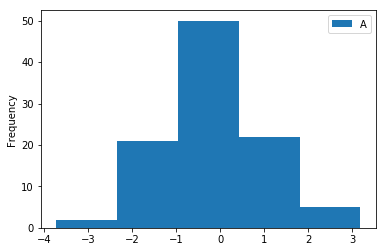

In [192]:
df_histogram(df, 'A', 5)

**Q3 Solution**

In [193]:
def df_scatterplot(df, x_colname, y_colname):
    df.plot(x = x_colname, y = y_colname, kind='scatter')
    return
  

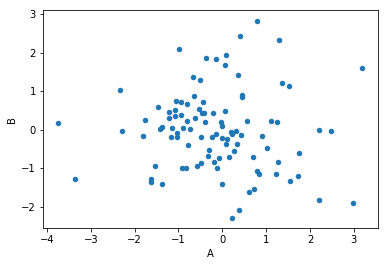

In [195]:
df_scatterplot(df,'A', 'B')

#### Q4 Instructions

Given a DataFrame, df, any fields that are null (represented in Pandas
  with NaN) will be replaced using the method specified in replace_method.

#### Parameters

  df: (Pandas DataFrame).

  replace_method: (variable type) 'mean', 'median', 0, -1, 9999999, etc.
      If 'mean'/'median': replace each missing value with the mean/median
                          value of its column.
      If other: any other value will be taken to be a replacement *value*
                and inserted for the missing values.
#### Returns

  df: (Pandas DataFrame)

In [5]:
# sample data
import pandas as pd
df = pd.DataFrame({'a':[0,10,None,30], 'b':[None,100,1000,10000], 'c':[1,2,3,4]})

In [6]:
df

,a,b,c
0,0.0,NaN,1
1,10.0,100.0,2
2,NaN,1000.0,3
3,30.0,10000.0,4


In [35]:
def replace_missing(df, replace_method='mean'):
        
        fill_type = replace_method
        
        if fill_type == 'mean':
            filler = df.mean()
            return df.fillna(filler)
        
        elif fill_type == 'median':
            filler = df.median()
            return df.fillna(filler)
        
        else:
            return df.fillna(fill_type)  
            
        







In [42]:
replace_missing(df, replace_method = 'mean')

,a,b,c
0,0.000000,3700.0,1
1,10.000000,100.0,2
2,13.333333,1000.0,3
3,30.000000,10000.0,4


In [37]:
df.fillna(df.mean())


,a,b,c
0,0.000000,3700.0,1
1,10.000000,100.0,2
2,13.333333,1000.0,3
3,30.000000,10000.0,4
